In [ ]:
!pip install pymatgen
from pymatgen.ext.matproj import MPRester

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
key = "TPsF1E0SdWGiycbX"
with MPRester(key) as mpr:
  data = pd.DataFrame(mpr.query("**O3", ["task_id", "full_formula", "pretty_formula", "nsites", "band_gap", "formation_energy_per_atom", "icsd_ids", "e_above_hull"]))

/usr/local/lib/python3.7/dist-packages/pymatgen/core/periodic_table.py:216: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  "avoid errors caused by the code expecting a float." % self.symbol
/usr/local/lib/python3.7/dist-packages/pymatgen/core/periodic_table.py:216: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  "avoid errors caused by the code expecting a float." % self.symbol
/usr/local/lib/python3.7/dist-packages/pymatgen/core/periodic_table.py:216: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  "avoid errors caused by the code expecting a float." % self.symbol
/usr/local/lib/python3.7/dist-packages/pymatgen/core/periodic_table.py:216: UserWa

In [ ]:
print(data)
total_ABO3_cp = len(data)
print(f"There is a total of {total_ABO3_cp} ABO3 compunds in this Material project.")
num_unq_formulae = len(data["full_formula"].unique())
print(f"There are {num_unq_formulae} unique ABO3 formulae.")

data["formation_energy_J_per_mol"] = data["formation_energy_per_atom"] * 96491.5666370759
print(data["formation_energy_J_per_mol"])

         task_id full_formula pretty_formula  nsites  band_gap  \
0     mp-1001571     Ca1Fe1O3         CaFeO3       5    0.0000   
1     mp-1016821     Ba1Si1O3         BaSiO3       5    1.0186   
2     mp-1016823     Ba1Ge1O3         BaGeO3       5    0.0000   
3     mp-1016828     Cd1Ir1O3         CdIrO3       5    0.0000   
4     mp-1016833     Ca1Rh1O3         CaRhO3       5    0.0000   
...          ...          ...            ...     ...       ...   
2393    mvc-4001    Zn4Cr4O12         ZnCrO3      20    0.0280   
2394    mvc-4002    Zn4Mo4O12         ZnMoO3      20    0.8663   
2395    mvc-4008    Zn4Ni4O12         ZnNiO3      20    0.0000   
2396    mvc-4013     Zn4W4O12          ZnWO3      20    1.7419   
2397    mvc-5731      Zn1W1O3          ZnWO3       5    0.0000   

      formation_energy_per_atom icsd_ids  e_above_hull  
0                     -2.282308       []      0.052161  
1                     -2.852291       []      0.561269  
2                     -2.473919     

In [ ]:
count = 0
for i in data["icsd_ids"]:
  if len(i) == 0:
    count += 1
print(count)
fraction_w_a_icsd = (total_ABO3_cp - count)/ total_ABO3_cp
print(fraction_w_a_icsd)

data2 = pd.DataFrame()
data2 = data2.append({"unstable and metallic": 0, "unstable and small band gap": 0, "unstable and large band gap": 0, "stable and metallic": 0, "stable and small band gap": 0, "stable and large band gap": 0}, ignore_index=True)
print(data2)
for i in data.values:
  if i[data.columns.get_loc("e_above_hull")] > 0.3:
    if i[data.columns.get_loc("band_gap")] == 0:
      data2["unstable and metallic"][0] += 1
    elif i[data.columns.get_loc("band_gap")] > 0 and i[data.columns.get_loc("band_gap")] <= 1:
      data2["unstable and small band gap"][0] += 1
    elif i[data.columns.get_loc("band_gap")] > 1:
      data2["unstable and large band gap"][0] += 1
  elif i[data.columns.get_loc("e_above_hull")] <= 0.3:
    if i[data.columns.get_loc("band_gap")] == 0:
      data2["stable and metallic"][0] += 1
    elif i[data.columns.get_loc("band_gap")] > 0 and i[data.columns.get_loc("band_gap")] <= 1:
      data2["stable and small band gap"][0] += 1
    elif i[data.columns.get_loc("band_gap")] > 1:
      data2["stable and large band gap"][0] += 1
print("\n")
print(data2)



1533
0.36071726438698914
   unstable and metallic  unstable and small band gap  \
0                    0.0                          0.0   

   unstable and large band gap  stable and metallic  \
0                          0.0                  0.0   

   stable and small band gap  stable and large band gap  
0                        0.0                        0.0  


   unstable and metallic  unstable and small band gap  \
0                  532.0                         63.0   

   unstable and large band gap  stable and metallic  \
0                         55.0                611.0   

   stable and small band gap  stable and large band gap  
0                      231.0                      906.0  


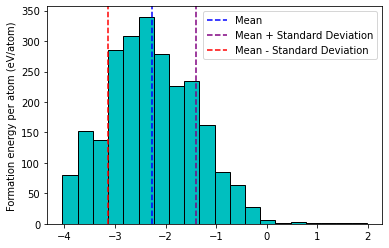

In [ ]:
import statistics
plt.hist(data["formation_energy_per_atom"], bins = 20, color="c", edgecolor="k")
mean_fe = statistics.mean(data["formation_energy_per_atom"].values)
stv_fe = statistics.stdev(data["formation_energy_per_atom"].values)
plt.axvline(mean_fe, color="b", linestyle="dashed", label="Mean")
plt.axvline(mean_fe + stv_fe, color="purple", linestyle="dashed", label="Mean + Standard Deviation")
plt.axvline(mean_fe - stv_fe, color="r", linestyle="dashed", label="Mean - Standard Deviation")
plt.legend()
plt.ylabel("Formation energy per atom (eV/atom)")
plt.show()

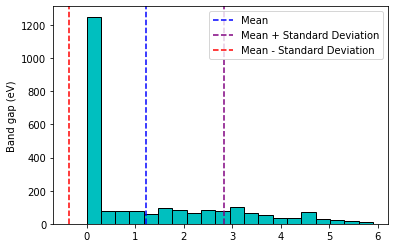

In [ ]:
plt.hist(data["band_gap"], bins = 20, color="c", edgecolor="k")
mean_fe = statistics.mean(data["band_gap"].values)
stv_fe = statistics.stdev(data["band_gap"].values)
plt.axvline(mean_fe, color="b", linestyle="dashed", label="Mean")
plt.axvline(mean_fe + stv_fe, color="purple", linestyle="dashed", label="Mean + Standard Deviation")
plt.axvline(mean_fe - stv_fe, color="r", linestyle="dashed", label = "Mean - Standard Deviation")
plt.ylabel("Band gap (eV)")
plt.legend()
plt.show()

In [ ]:
OQMD_dataset = pd.read_csv("/content/drive/MyDrive/OQMD.csv")
OQMD_dataset = pd.DataFrame(OQMD_dataset)
print(OQMD_dataset)
print(f"There are {len(OQMD_dataset)} compounds in the OQMD dataset.")
print(f"Ther are {len(OQMD_dataset.columns)} columns in this dataset. The column names are {[i for i in OQMD_dataset.columns]}")

     Chemical formula   A   B  In literature          Valence A  \
0               Ac2O3  Ac  Ac          False  element not in BV   
1              AcAgO3  Ac  Ag          False  element not in BV   
2              AcAlO3  Ac  Al          False  element not in BV   
3              AcAsO3  Ac  As          False  element not in BV   
4              AcAuO3  Ac  Au          False  element not in BV   
...               ...  ..  ..            ...                ...   
5324            ZrWO3  Zr   W          False                  1   
5325            ZrYO3  Zr   Y          False       not balanced   
5326           ZrYbO3  Zr  Yb          False       not balanced   
5327           ZrZnO3  Zr  Zn          False       not balanced   
5328            Zr2O3  Zr  Zr          False       not balanced   

              Valence B  Radius A [ang]  Radius B [ang] Lowest distortion  \
0     element not in BV            1.12            1.12             cubic   
1     element not in BV            1.12  

In [ ]:


rows_to_drop = OQMD_dataset[OQMD_dataset["Formation energy [eV/atom]"]=="-"].index
OQMD_dataset = pd.DataFrame(OQMD_dataset.drop(rows_to_drop))

In [ ]:
print(OQMD_dataset)

     Chemical formula   A   B  In literature          Valence A  \
0               Ac2O3  Ac  Ac          False  element not in BV   
1              AcAgO3  Ac  Ag          False  element not in BV   
2              AcAlO3  Ac  Al          False  element not in BV   
3              AcAsO3  Ac  As          False  element not in BV   
4              AcAuO3  Ac  Au          False  element not in BV   
...               ...  ..  ..            ...                ...   
5324            ZrWO3  Zr   W          False                  1   
5325            ZrYO3  Zr   Y          False       not balanced   
5326           ZrYbO3  Zr  Yb          False       not balanced   
5327           ZrZnO3  Zr  Zn          False       not balanced   
5328            Zr2O3  Zr  Zr          False       not balanced   

              Valence B  Radius A [ang]  Radius B [ang] Lowest distortion  \
0     element not in BV            1.12            1.12             cubic   
1     element not in BV            1.12  

In [ ]:
OQMD_dataset["Formation energy [eV/atom]"] = pd.to_numeric(OQMD_dataset["Formation energy [eV/atom]"])

In [ ]:
OQMD_dataset = OQMD_dataset.reset_index()
print(OQMD_dataset)


      index Chemical formula   A   B  In literature          Valence A  \
0         0            Ac2O3  Ac  Ac          False  element not in BV   
1         1           AcAgO3  Ac  Ag          False  element not in BV   
2         2           AcAlO3  Ac  Al          False  element not in BV   
3         3           AcAsO3  Ac  As          False  element not in BV   
4         4           AcAuO3  Ac  Au          False  element not in BV   
...     ...              ...  ..  ..            ...                ...   
5271   5324            ZrWO3  Zr   W          False                  1   
5272   5325            ZrYO3  Zr   Y          False       not balanced   
5273   5326           ZrYbO3  Zr  Yb          False       not balanced   
5274   5327           ZrZnO3  Zr  Zn          False       not balanced   
5275   5328            Zr2O3  Zr  Zr          False       not balanced   

              Valence B  Radius A [ang]  Radius B [ang] Lowest distortion  \
0     element not in BV           

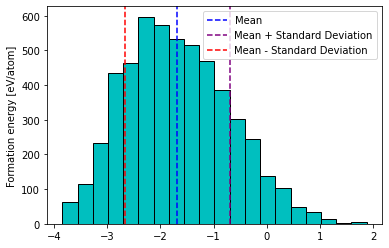

In [ ]:
plt.hist(OQMD_dataset["Formation energy [eV/atom]"].values, color = "c", bins = 20, edgecolor="k")
mean_OQMD = statistics.mean(OQMD_dataset["Formation energy [eV/atom]"].values)
stv_OQMD = statistics.stdev(OQMD_dataset["Formation energy [eV/atom]"].values)
plt.axvline(mean_OQMD, color="b", linestyle = "dashed", label="Mean")
plt.axvline(mean_OQMD + stv_OQMD, color="purple", linestyle = "dashed", label="Mean + Standard Deviation")
plt.axvline(mean_OQMD - stv_OQMD, color="red", linestyle = "dashed", label="Mean - Standard Deviation")
plt.legend()
plt.ylabel("Formation energy [eV/atom]")
plt.show()

In [ ]:
set1 = set(list(data["pretty_formula"].unique()))
set2 = set(list(OQMD_dataset["Chemical formula"].unique()))
combined_set = set1.intersection(set2)
print(combined_set)
print(len(combined_set))
combined_list = list(combined_set)
print(combined_list)

{'HoMnO3', 'SrPdO3', 'BaAuO3', 'ScCuO3', 'InSiO3', 'HgTeO3', 'BeReO3', 'SrMgO3', 'KRhO3', 'RbCrO3', 'LiErO3', 'ZrTlO3', 'CoAuO3', 'BeCdO3', 'NaBiO3', 'SmSbO3', 'SrCrO3', 'PaTaO3', 'CaVO3', 'KZrO3', 'TePbO3', 'LaTlO3', 'YbMgO3', 'LiBO3', 'NaPbO3', 'CaInO3', 'SmCoO3', 'BaCrO3', 'EuGeO3', 'RbYbO3', 'RbBiO3', 'CuBO3', 'BaCoO3', 'YHoO3', 'MgMnO3', 'HfThO3', 'InRhO3', 'RbIrO3', 'GdSiO3', 'YbTiO3', 'MnAlO3', 'PaCoO3', 'EuErO3', 'BaReO3', 'HoGaO3', 'NpHgO3', 'SmTmO3', 'ZnMoO3', 'SrWO3', 'BePtO3', 'MgOsO3', 'CoMoO3', 'BaThO3', 'SrNdO3', 'CdSnO3', 'SrAlO3', 'ThReO3', 'VBiO3', 'HgIrO3', 'SmCuO3', 'ScInO3', 'LiCrO3', 'NaTcO3', 'ZnCoO3', 'MgGeO3', 'TiNiO3', 'ZnBO3', 'CsNbO3', 'DySbO3', 'GdAsO3', 'ErIrO3', 'DyLuO3', 'ScAsO3', 'MnZnO3', 'HoLuO3', 'LaPtO3', 'RbBeO3', 'AgTeO3', 'SrIrO3', 'LaTmO3', 'KMnO3', 'NaSbO3', 'AgSbO3', 'CeTaO3', 'SrAuO3', 'YGaO3', 'SrFeO3', 'NpSnO3', 'UTcO3', 'ZnSnO3', 'RbSrO3', 'TiZnO3', 'TlHgO3', 'KBiO3', 'LaGaO3', 'TbGeO3', 'BaVO3', 'SbAuO3', 'HoSiO3', 'CsTaO3', 'AgAuO3', 'Tm

In [ ]:


unq_pret_cl_data = data.drop_duplicates(subset="pretty_formula")
new_data = unq_pret_cl_data[unq_pret_cl_data["pretty_formula"].isin(combined_list)].reset_index()

unq_ChemF_cl_OQMD_data = OQMD_dataset.drop_duplicates(subset="Chemical formula")
new_OQMD_dataset  = unq_ChemF_cl_OQMD_data[unq_ChemF_cl_OQMD_data["Chemical formula"].isin(combined_list)].reset_index()

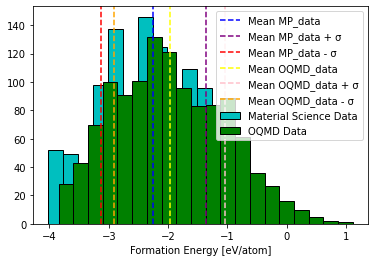

In [ ]:
plt.hist(new_data['formation_energy_per_atom'].values, bins=20, color="c", edgecolor="k", label = "Material Science Data")
plt.hist(new_OQMD_dataset["Formation energy [eV/atom]"].values, bins=20, color="g", edgecolor="k", label = "OQMD Data")

mean_new_data = statistics.mean(new_data['formation_energy_per_atom'].values)
stdev_new_data = statistics.stdev(new_data['formation_energy_per_atom'].values)

mean_OQMD_data = statistics.mean(new_OQMD_dataset["Formation energy [eV/atom]"].values)
stdev_OQMD_data = statistics.stdev(new_OQMD_dataset["Formation energy [eV/atom]"].values)

plt.axvline(mean_new_data, color = 'b', linestyle="dashed", label="Mean MP_data")
plt.axvline(mean_new_data + stdev_new_data, color = 'purple', linestyle="dashed", label="Mean MP_data + σ")
plt.axvline(mean_new_data - stdev_new_data, color = 'red', linestyle="dashed", label="Mean MP_data - σ")

plt.axvline(mean_OQMD_data, color = 'yellow', linestyle="dashed", label="Mean OQMD_data")
plt.axvline(mean_OQMD_data + stdev_OQMD_data, color = 'pink', linestyle="dashed", label="Mean OQMD_data + σ")
plt.axvline(mean_OQMD_data - stdev_OQMD_data, color = 'orange', linestyle="dashed", label="Mean OQMD_data - σ")
plt.legend()

plt.xlabel("Formation Energy [eV/atom]")
plt.legend()
plt.show()

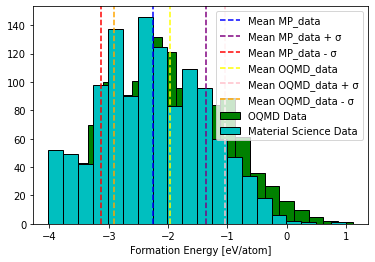

In [ ]:
plt.hist(new_OQMD_dataset["Formation energy [eV/atom]"].values, bins=20, color="g", edgecolor="k", label = "OQMD Data")
plt.hist(new_data['formation_energy_per_atom'].values, bins=20, color="c", edgecolor="k", label = "Material Science Data")

mean_new_data = statistics.mean(new_data['formation_energy_per_atom'].values)
stdev_new_data = statistics.stdev(new_data['formation_energy_per_atom'].values)

mean_OQMD_data = statistics.mean(new_OQMD_dataset["Formation energy [eV/atom]"].values)
stdev_OQMD_data = statistics.stdev(new_OQMD_dataset["Formation energy [eV/atom]"].values)

plt.axvline(mean_new_data, color = 'b', linestyle="dashed", label="Mean MP_data")
plt.axvline(mean_new_data + stdev_new_data, color = 'purple', linestyle="dashed", label="Mean MP_data + σ")
plt.axvline(mean_new_data - stdev_new_data, color = 'red', linestyle="dashed", label="Mean MP_data - σ")

plt.axvline(mean_OQMD_data, color = 'yellow', linestyle="dashed", label="Mean OQMD_data")
plt.axvline(mean_OQMD_data + stdev_OQMD_data, color = 'pink', linestyle="dashed", label="Mean OQMD_data + σ")
plt.axvline(mean_OQMD_data - stdev_OQMD_data, color = 'orange', linestyle="dashed", label="Mean OQMD_data - σ")
plt.legend()

plt.xlabel("Formation Energy [eV/atom]")
plt.legend()
plt.show()

In [ ]:
from scipy import stats

result = stats.ttest_ind(new_OQMD_dataset["Formation energy [eV/atom]"].values, new_data['formation_energy_per_atom'].values)
print(result)
print(f"The P value is {result}. This is lower than 0.05 which indicates that\nthere is a statistically significant difference between the Material Science dataset and the OQMD dataset.")

Ttest_indResult(statistic=7.446181706729799, pvalue=1.333855555406367e-13)
The P value is Ttest_indResult(statistic=7.446181706729799, pvalue=1.333855555406367e-13). This is lower than 0.05 which indicates that
there is a statistically significant difference between the Material Science dataset and the OQMD dataset.


This significant difference may be due to different calculation methods being used by Material Project and the OQMD dataset researchers leading to different formation energies for the ABO3 compounds. This difference in calculation methods and/or constants used to calculate the formation energies is likely due to the OQMD dataset being outdated compared to the Material Project dataset, which (unlike the OQMD dataset) is frequently updated, as the OQMD dataset has been published in 2017 (5 years from now).

In [ ]:
orig_data = pd.read_csv("/content/drive/MyDrive/data", na_filter=False)
orig_data


,task_id,formula,formation_energy_per_atom,e_above_hull,band_gap,has_bandstructure
0,mp-1007923,CrNi3,-0.016354,0.000802,0.0000,False
1,mp-1008754,TbHg2,-0.069428,0.329909,0.0000,True
2,mp-1016886,MgVO3,-2.241438,0.545977,0.0000,True
3,mp-1018902,PrSbPt,-1.111238,0.000000,0.0000,True
4,mp-1020595,Rb8PO3,-0.772860,0.491666,0.0000,True
...,...,...,...,...,...,...
124510,mvc-9995,Zn(MoO2)2,-1.774105,0.170001,0.6809,True
124511,mvc-9996,MgV2O4,-2.669536,0.053871,1.4898,True
124512,mvc-9997,Ca(CoO2)2,-1.777514,0.161485,0.0000,True
124513,mvc-9998,CaLaCrWO6,-2.890804,0.061516,2.1305,True


In [ ]:
from pymatgen.core import Composition
import collections
import functools
import operator

combined_elements_set = set()
length_el = []
combined_elements_list = []
el_to_count = {}
for i in orig_data["formula"].values:
  comp = Composition(i)
  length_el.append(len(comp.elements))
  for i in comp.elements:
    combined_elements_set.add(i)
    combined_elements_list.append(i)

# sum the values with same keys
#el_to_count = dict(functools.reduce(operator.add, map(collections.Counter, el_to_count)))


max_el = max(length_el)
print(f"There are {len(combined_elements_set)} unique elements in the dataset.\n\nThe maximum number of elements in a single structure is {max_el}.")

There are 89 unique elements in the dataset.

The maximum number of elements in a single structure is 9.


In [ ]:
for i in list(combined_elements_set):
  el_to_count[str(i)] = combined_elements_list.count(i)
print(el_to_count)

{'H': 8067, 'He': 8, 'Li': 18580, 'Be': 1065, 'B': 5405, 'C': 7521, 'N': 9723, 'O': 60428, 'F': 9606, 'Ne': 1, 'Na': 7296, 'Mg': 8711, 'Al': 6446, 'Si': 8940, 'P': 13321, 'S': 10516, 'Cl': 5608, 'Ar': 2, 'K': 6398, 'Ca': 6328, 'Sc': 2060, 'Ti': 5723, 'V': 7276, 'Cr': 5368, 'Mn': 11233, 'Fe': 10109, 'Co': 8612, 'Ni': 6767, 'Cu': 7999, 'Zn': 5235, 'Ga': 4024, 'Ge': 4482, 'As': 3425, 'Se': 5500, 'Br': 2691, 'Kr': 15, 'Rb': 3814, 'Sr': 5117, 'Y': 3814, 'Zr': 2722, 'Nb': 3248, 'Mo': 4226, 'Tc': 648, 'Ru': 2145, 'Rh': 2298, 'Pd': 2755, 'Ag': 3540, 'Cd': 2880, 'In': 3599, 'Sn': 4722, 'Sb': 4630, 'Te': 4167, 'I': 2715, 'Xe': 147, 'Cs': 3549, 'Ba': 6092, 'La': 4256, 'Ce': 2650, 'Pr': 2276, 'Nd': 2574, 'Pm': 515, 'Sm': 2335, 'Eu': 1610, 'Gd': 1444, 'Tb': 1741, 'Dy': 1874, 'Ho': 1886, 'Er': 1930, 'Tm': 1495, 'Yb': 1872, 'Lu': 1465, 'Hf': 1642, 'Ta': 2384, 'W': 3683, 'Re': 1313, 'Os': 1107, 'Ir': 1861, 'Pt': 2224, 'Au': 2343, 'Hg': 2127, 'Tl': 2632, 'Pb': 2624, 'Bi': 3782, 'Ac': 297, 'Th': 972, 'P

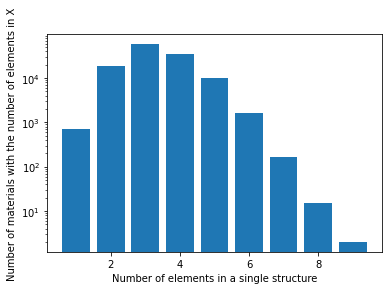

In [ ]:
import numpy as np
X = np.unique(length_el)
Y = []
for i in X:
  Y.append(length_el.count(i))

plt.bar(x = X, height = Y, log = True)
plt.xlabel("Number of elements in a single structure")
plt.ylabel("Number of materials with the number of elements in X")
plt.show()

In [ ]:
sorted_elements = sorted(el_to_count, key=el_to_count.get)
print(f"The 10 most common elements in this dataset are {sorted_elements[-10:][::-1]}\nThe 10 least common elements in this dataset are {sorted_elements[:10]}")

The 10 most common elements in this dataset are ['O', 'Li', 'P', 'Mn', 'S', 'Fe', 'N', 'F', 'Si', 'Mg']
The 10 least common elements in this dataset are ['Ne', 'Ar', 'He', 'Kr', 'Xe', 'Pa', 'Ac', 'Np', 'Pu', 'Pm']
